# House Price Prediction Using Regularization for Surprise Housing

## Importing and Reading data

In [273]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [274]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
# Importing dataset into 'train_df' python dataframe
train_df = pd.read_csv('Datasets/train.csv')
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [276]:
# Let us see the shape of the data
train_df.shape

(1460, 81)

In [277]:
# Let us check for the null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have 19 fields with Null values, let us print the field names.

In [278]:
train_df.columns[train_df.isna().any()].to_list()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Fixing Null values in the Numerical fields 
#### Updating Null values in the numerical field 'Alley'

Let us check the values in the field "Alley"

In [279]:
train_df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Based on Data Description, Let us fill value 'No alley access' in the field "Alley".

In [280]:
train_df.Alley = train_df.Alley.fillna('No alley access')
train_df.Alley

0       No alley access
1       No alley access
2       No alley access
3       No alley access
4       No alley access
             ...       
1455    No alley access
1456    No alley access
1457    No alley access
1458    No alley access
1459    No alley access
Name: Alley, Length: 1460, dtype: object

Let us check the value count now.

In [281]:
train_df.Alley.value_counts()

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [282]:
# Checking a data item with max occurence in the column
train_df.Alley.value_counts().max()

1369

In [283]:
# Total number of records
len(train_df.Alley)

1460

In [284]:
1369/1460*100

93.76712328767123

Thus we have overall 94% occurence of a single value 'No alley access" in this column. Thus we can remove this column as this is not usefull column for our analysis.

In [285]:
Cols_to_remove = ['Alley']
Cols_to_remove

['Alley']

#### Updating Null values in the numerical field 'BsmtQual' and 'BsmtCond'

In [286]:
# let us check for the values in the "BsmtQual" field
train_df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [287]:
# let us check for the values in the "BsmtCond" field
train_df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

Let us fill value 'NA' in the fields "BsmtQual" and "BsmtCond" to keep the consistency in the values.

In [288]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtQual"
train_df.BsmtQual = train_df.BsmtQual.fillna('NA')
train_df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [289]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtCond"
train_df.BsmtCond = train_df.BsmtCond.fillna('NA')
train_df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [290]:
# Let us check for the % of the data items occured max times in both the fields
print(train_df.BsmtQual.value_counts().max()/1460*100)
print(train_df.BsmtCond.value_counts().max()/1460*100)

44.45205479452055
89.7945205479452


If we consider a threshold of 80%, field 'BsmtCond' can be removed.

In [291]:
Cols_to_remove.append('BsmtCond')
Cols_to_remove

['Alley', 'BsmtCond']

#### Updating Null values in the numerical field 'BsmtExposure'

In [292]:
# let us check for the values in the "BsmtExposure" field
train_df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [293]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtExposure" for 'No Basement' 
train_df.BsmtExposure = train_df.BsmtExposure.fillna('NA')
train_df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64

In [294]:
# Let us check for the % of the data items occured max times in this fields
print(train_df.BsmtExposure.value_counts().max()/1460*100)

65.27397260273973


This is below 80%, hence, we will not remove this field. <br/>
Let us cross-check all the columns after checking the Null values.

#### Updating Null values in the numerical field 'BsmtFinType1'

In [295]:
# let us check for the values in the "BsmtFinType1" field
train_df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [296]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtFinType1" for 'No Basement' 
train_df.BsmtFinType1 = train_df.BsmtFinType1.fillna('NA')
train_df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

#### Updating Null values in the numerical field 'BsmtFinType2'

In [297]:
# let us check for the values in the "BsmtFinType2" field
train_df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [298]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtFinType2" for 'No Basement' 
train_df.BsmtFinType2 = train_df.BsmtFinType2.fillna('NA')
train_df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

#### Updating Null values in the numerical field 'FireplaceQu'

In [299]:
# let us check for the values in the "FireplaceQu" field
train_df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [300]:
# Based on Data Description, Let us fill value 'NA' in the field "FireplaceQu" for 'No Fireplace' 
train_df.FireplaceQu = train_df.FireplaceQu.fillna('NA')
train_df.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### Updating Null values in the numerical field 'GarageType'

In [301]:
# let us check for the values in the "GarageType" field
train_df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [302]:
# Based on Data Description, Let us fill value 'NA' in the field "GarageType" for 'No Garage' 
train_df.GarageType = train_df.GarageType.fillna('NA')
train_df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

#### Updating Null values in the numerical field 'GarageFinish'

In [303]:
# let us check for the values in the "GarageFinish" field
train_df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [304]:
# Based on Data Description, Let us fill value 'NA' in the field "GarageFinish" as there is no Garage.
train_df.GarageFinish = train_df.GarageFinish.fillna('NA')
train_df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64

#### Updating Null values in the numerical field 'GarageQual'

In [305]:
# let us check for the values in the "GarageQual" field
train_df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [306]:
# Based on Data Description, Let us fill value 'NA' in the field "GarageQual" as there is no Garage.
train_df.GarageQual = train_df.GarageQual.fillna('NA')
train_df.GarageQual.value_counts()

TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

#### Updating Null values in the numerical field 'GarageCond'

In [307]:
# let us check for the values in the "GarageCond" field
train_df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [308]:
# Based on Data Description, Let us fill value 'NA' in the field "GarageCond" as there is no Garage.
train_df.GarageCond = train_df.GarageCond.fillna('NA')
train_df.GarageCond.value_counts()

TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

#### Updating Null values in the numerical field 'PoolQC'

In [309]:
# let us check for the values in the "PoolQC" field
train_df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [310]:
# Based on Data Description, Let us fill value 'NA' in the field "PoolQC" for 'No Pool'
train_df.PoolQC = train_df.PoolQC.fillna('NA')
train_df.PoolQC.value_counts()

NA    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

#### Updating Null values in the numerical field 'Fence'

In [311]:
# let us check for the values in the "Fence" field
train_df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [312]:
# Based on Data Description, Let us fill value 'NA' in the field "Fence" for 'No Fence'
train_df.Fence = train_df.Fence.fillna('NA')
train_df.Fence.value_counts()

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

#### Updating Null values in the numerical field 'MiscFeature'

In [313]:
# let us check for the values in the "MiscFeature" field
train_df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [314]:
# Based on Data Description, Let us fill value 'NA' in the field "MiscFeature" for 'None'
train_df.MiscFeature = train_df.MiscFeature.fillna('NA')
train_df.MiscFeature.value_counts()

NA      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

#### Updating Null values in the numerical field 'MasVnrType'

In [315]:
# let us check for the values in the "MasVnrType" field
train_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [316]:
# Since there are only 8 Null values, let us update the Null values with NA.
train_df.MasVnrType = train_df.MasVnrType.fillna('NA')
train_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
NA           8
Name: MasVnrType, dtype: int64

#### Updating Null values in the numerical field 'Electrical'

In [317]:
# let us check for the values in the "Electrical" field
train_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [318]:
# Since there is only 1 Null values, let us update the Null value with None.
train_df.Electrical = train_df.Electrical.fillna('NA')
train_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64

### Fixing Null values in the Numerical fields 
#### Updating Null values in the numerical field 'LotFrontage'

In [319]:
# Let us check for the minimum value in the field 'LotFrontage'
min(train_df.LotFrontage)

21.0

This means there is no 0 value in the field 'LotFrontage'. <br/>
Let us update the median value of field 'LotFrontage' for Null values.

In [320]:
LotFrontage_med = train_df.LotFrontage[train_df.LotFrontage!=0].median()
LotFrontage_med

69.0

In [321]:
# Let us check for the average of LotFrontage field.
train_df.LotFrontage[train_df.LotFrontage!=0].mean()

70.04995836802665

In [322]:
# Both median value and the average value of the field 'LotFrontage' is almost close, 
# hence, let us update above median value in the field 'LotFrontage'
train_df.LotFrontage = train_df.LotFrontage.fillna(LotFrontage_med)

#### Updating Null values in the numerical field 'MasVnrArea'

In [323]:
# Let us check for the values in the "MasVnrArea" field and if it contains value 0
train_df.MasVnrArea.sort_values().value_counts()

0.0       861
180.0       8
108.0       8
72.0        8
16.0        7
         ... 
254.0       1
255.0       1
258.0       1
259.0       1
1600.0      1
Name: MasVnrArea, Length: 327, dtype: int64

Thus, there are 861 records with 0 vaulue. <br/>
Let us check for the non-zero values.

In [324]:
train_df.MasVnrArea[train_df.MasVnrArea!=0].sort_values().value_counts()

180.0     8
72.0      8
108.0     8
120.0     7
16.0      7
         ..
297.0     1
81.0      1
299.0     1
67.0      1
1600.0    1
Name: MasVnrArea, Length: 326, dtype: int64

In [325]:
# Let us check for the median of non-zero MasVnrArea values.
MasVnrArea_med = train_df.MasVnrArea[train_df.MasVnrArea!=0].median()
MasVnrArea_med

203.0

In [326]:
# Let us update above median value in the field 'MasVnrArea'
train_df.MasVnrArea = train_df.MasVnrArea.fillna(MasVnrArea_med)

#### Updating 'GarageYrBlt' field with value 0

In [327]:
train_df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [328]:
train_df.GarageYrBlt = train_df.GarageYrBlt.fillna(0)

In [329]:
train_df.GarageYrBlt.value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [330]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Above result also shows that there is no Null values as the non-null count of all the fields and the total number entries are same. <br />
However, let us confirm with isnull() function.

In [331]:
# Check Null values
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [332]:
train_df.columns[train_df.isna().any()].to_list()

[]

In [333]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [334]:
train_df['MSZoning'].dtype == 'object'

True

### As mentioned earlier, let us check for the fields with a data item appearing more than 80% in the respective column.

In [335]:
Cols_to_remove = []
for i in range(0,train_df.shape[1]):
    if train_df[train_df.columns[i]].dtype == 'object':
        if train_df[train_df.columns[i]].value_counts().max()/1460*100 > 80:
            print(i+1,
                  train_df[train_df.columns[i]].dtype, 
                  train_df.columns[i], 
                  train_df[train_df.columns[i]].value_counts().max()/1460*100, 
                  train_df[train_df.columns[i]].nunique(), sep=" | ") 
            Cols_to_remove.append(train_df.columns[i])
        # print(train_df.BsmtCond.value_counts().max()/1460*100)
print(Cols_to_remove)   

6 | object | Street | 99.58904109589041 | 2
7 | object | Alley | 93.76712328767123 | 3
9 | object | LandContour | 89.7945205479452 | 4
10 | object | Utilities | 99.93150684931507 | 2
12 | object | LandSlope | 94.65753424657535 | 3
14 | object | Condition1 | 86.3013698630137 | 9
15 | object | Condition2 | 98.97260273972603 | 8
16 | object | BldgType | 83.56164383561644 | 5
23 | object | RoofMatl | 98.21917808219179 | 8
29 | object | ExterCond | 87.8082191780822 | 5
32 | object | BsmtCond | 89.7945205479452 | 5
36 | object | BsmtFinType2 | 86.02739726027397 | 7
40 | object | Heating | 97.80821917808218 | 6
42 | object | CentralAir | 93.4931506849315 | 2
43 | object | Electrical | 91.36986301369862 | 6
56 | object | Functional | 93.15068493150685 | 7
64 | object | GarageQual | 89.7945205479452 | 6
65 | object | GarageCond | 90.82191780821918 | 6
66 | object | PavedDrive | 91.78082191780823 | 3
73 | object | PoolQC | 99.52054794520548 | 4
74 | object | Fence | 80.75342465753424 | 5
75 | ob

In [336]:
# Let us drop these columns
train_df2 = train_df.drop(Cols_to_remove, axis=1)
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

### Same way, let us check for the numerical fields with a data item appearing more than 80% in the respective column.

In [337]:
Cols_to_remove = []
for i in range(0,train_df2.shape[1]):
    if train_df2[train_df2.columns[i]].dtype != 'object':
        if train_df2[train_df2.columns[i]].value_counts().max()/1460*100 > 80:
            print(i+1,
                  train_df2[train_df2.columns[i]].dtype, 
                  train_df2.columns[i], 
                  train_df2[train_df2.columns[i]].value_counts().max()/1460*100, 
                  train_df2[train_df2.columns[i]].nunique(), sep=" | ") 
            Cols_to_remove.append(train_df2.columns[i])
        # print(train_df.BsmtCond.value_counts().max()/1460*100)
print(Cols_to_remove) 

25 | int64 | BsmtFinSF2 | 88.56164383561645 | 144
31 | int64 | LowQualFinSF | 98.21917808219179 | 24
34 | int64 | BsmtHalfBath | 94.3835616438356 | 3
38 | int64 | KitchenAbvGr | 95.34246575342465 | 4
50 | int64 | EnclosedPorch | 85.75342465753425 | 120
51 | int64 | 3SsnPorch | 98.35616438356163 | 20
52 | int64 | ScreenPorch | 92.05479452054794 | 76
53 | int64 | PoolArea | 99.52054794520548 | 8
54 | int64 | MiscVal | 96.43835616438356 | 21
['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [338]:
# Let us drop these columns
train_df2 = train_df2.drop(Cols_to_remove, axis=1)
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1460 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   LotShape      1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   HouseStyle    1460 non-null   object 
 9   OverallQual   1460 non-null   int64  
 10  OverallCond   1460 non-null   int64  
 11  YearBuilt     1460 non-null   int64  
 12  YearRemodAdd  1460 non-null   int64  
 13  RoofStyle     1460 non-null   object 
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrType    1460 non-null   object 
 17  MasVnrArea    1460 non-null   float64
 18  ExterQual     1460 non-null 

In [339]:
for i in range(0,train_df2.shape[1]):
        print(i+1, train_df2.columns[i], train_df2[train_df2.columns[i]].nunique(), sep=" | ") 

1 | Id | 1460
2 | MSSubClass | 15
3 | MSZoning | 5
4 | LotFrontage | 110
5 | LotArea | 1073
6 | LotShape | 4
7 | LotConfig | 5
8 | Neighborhood | 25
9 | HouseStyle | 8
10 | OverallQual | 10
11 | OverallCond | 9
12 | YearBuilt | 112
13 | YearRemodAdd | 61
14 | RoofStyle | 6
15 | Exterior1st | 15
16 | Exterior2nd | 16
17 | MasVnrType | 5
18 | MasVnrArea | 327
19 | ExterQual | 4
20 | Foundation | 6
21 | BsmtQual | 5
22 | BsmtExposure | 5
23 | BsmtFinType1 | 7
24 | BsmtFinSF1 | 637
25 | BsmtUnfSF | 780
26 | TotalBsmtSF | 721
27 | HeatingQC | 5
28 | 1stFlrSF | 753
29 | 2ndFlrSF | 417
30 | GrLivArea | 861
31 | BsmtFullBath | 4
32 | FullBath | 4
33 | HalfBath | 3
34 | BedroomAbvGr | 8
35 | KitchenQual | 4
36 | TotRmsAbvGrd | 12
37 | Fireplaces | 4
38 | FireplaceQu | 6
39 | GarageType | 7
40 | GarageYrBlt | 98
41 | GarageFinish | 4
42 | GarageCars | 5
43 | GarageArea | 441
44 | WoodDeckSF | 274
45 | OpenPorchSF | 202
46 | MoSold | 12
47 | YrSold | 5
48 | SalePrice | 663


In [340]:
# Let us also drop field "Id" which has too much granular level
train_df2 = train_df2.drop('Id', axis=1)
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   Neighborhood  1460 non-null   object 
 7   HouseStyle    1460 non-null   object 
 8   OverallQual   1460 non-null   int64  
 9   OverallCond   1460 non-null   int64  
 10  YearBuilt     1460 non-null   int64  
 11  YearRemodAdd  1460 non-null   int64  
 12  RoofStyle     1460 non-null   object 
 13  Exterior1st   1460 non-null   object 
 14  Exterior2nd   1460 non-null   object 
 15  MasVnrType    1460 non-null   object 
 16  MasVnrArea    1460 non-null   float64
 17  ExterQual     1460 non-null   object 
 18  Foundation    1460 non-null 

## Data Preparation
### Checking outliers in the data.

In [341]:
for i in range(0,train_df2.shape[1]):
    if train_df2[train_df2.columns[i]].dtype != 'object':
        print(train_df2.columns[i]," | ",train_df2[train_df2.columns[i]].dtype)

MSSubClass  |  int64
LotFrontage  |  float64
LotArea  |  int64
OverallQual  |  int64
OverallCond  |  int64
YearBuilt  |  int64
YearRemodAdd  |  int64
MasVnrArea  |  float64
BsmtFinSF1  |  int64
BsmtUnfSF  |  int64
TotalBsmtSF  |  int64
1stFlrSF  |  int64
2ndFlrSF  |  int64
GrLivArea  |  int64
BsmtFullBath  |  int64
FullBath  |  int64
HalfBath  |  int64
BedroomAbvGr  |  int64
TotRmsAbvGrd  |  int64
Fireplaces  |  int64
GarageYrBlt  |  float64
GarageCars  |  int64
GarageArea  |  int64
WoodDeckSF  |  int64
OpenPorchSF  |  int64
MoSold  |  int64
YrSold  |  int64
SalePrice  |  int64


In [342]:
for i in range(0,train_df2.shape[1]):
    if train_df2[train_df2.columns[i]].dtype != 'object':
        print(train_df2.columns[i],end="','")

MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','MoSold','YrSold','SalePrice','

In [343]:
# Categorical Variables
['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
 'GarageYrBlt','MoSold','YrSold']

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'GarageYrBlt',
 'MoSold',
 'YrSold']

In [344]:
# Numerical Variables
['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
'GarageCars','GrLivArea','TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GarageCars',
 'GrLivArea',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [345]:
print(train_df2['Fireplaces'].value_counts())

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


In [346]:
dc=['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','FullBath','HalfBath',
'BedroomAbvGr','GarageYrBlt','MoSold','YrSold']
len(dc)

12

In [347]:
dn=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
'GrLivArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']
len(dn)

16

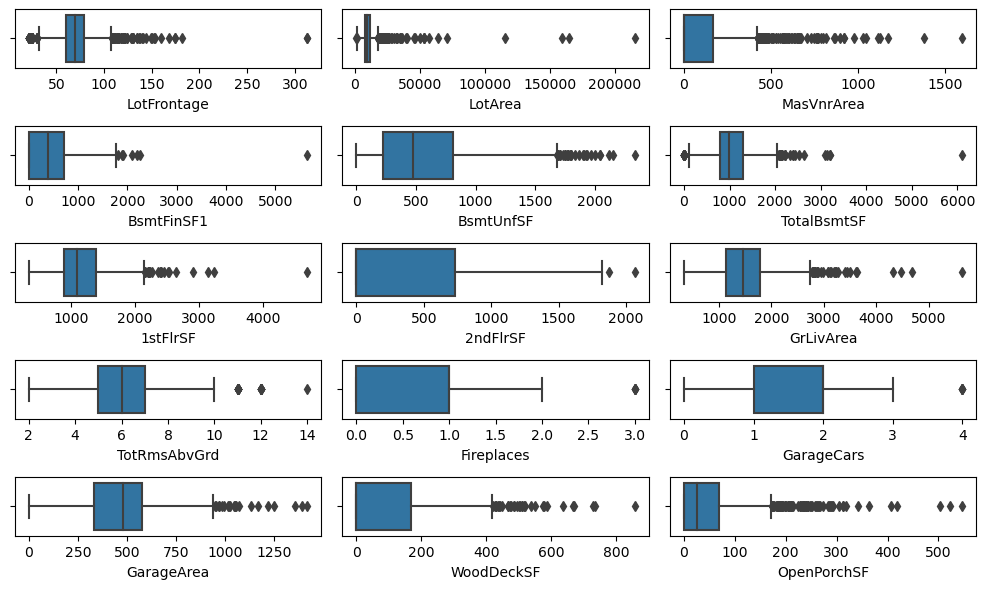

In [348]:
# Outlier Analysis
fig, axs = plt.subplots(5,3, figsize=(10,6))
plt1 = sns.boxplot(train_df2['LotFrontage'], ax = axs[0, 0])
plt2 = sns.boxplot(train_df2['LotArea'], ax = axs[0, 1])
plt3 = sns.boxplot(train_df2['MasVnrArea'], ax = axs[0, 2])
plt4 = sns.boxplot(train_df2['BsmtFinSF1'], ax = axs[1, 0])
plt5 = sns.boxplot(train_df2['BsmtUnfSF'], ax = axs[1, 1]) # BsmtFinSF2
plt6 = sns.boxplot(train_df2['TotalBsmtSF'], ax = axs[1, 2])
plt6 = sns.boxplot(train_df2['1stFlrSF'], ax = axs[2, 0])
plt6 = sns.boxplot(train_df2['2ndFlrSF'], ax = axs[2, 1])
plt6 = sns.boxplot(train_df2['GrLivArea'], ax = axs[2, 2])
plt6 = sns.boxplot(train_df2['TotRmsAbvGrd'], ax = axs[3, 0]) # LowQualFinSF
plt6 = sns.boxplot(train_df2['Fireplaces'], ax = axs[3, 1])
plt6 = sns.boxplot(train_df2['GarageCars'], ax = axs[3, 2])
plt6 = sns.boxplot(train_df2['GarageArea'], ax = axs[4, 0])
plt6 = sns.boxplot(train_df2['WoodDeckSF'], ax = axs[4, 1])
plt6 = sns.boxplot(train_df2['OpenPorchSF'], ax = axs[4, 2])
#plt6 = sns.boxplot(train_df2['SalePrice'], ax = axs[7, 0])

plt.tight_layout()

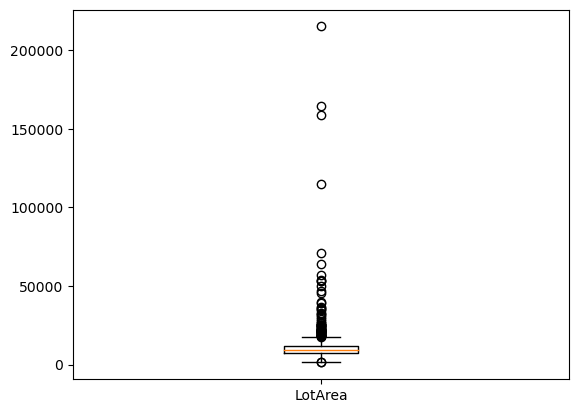

In [349]:
# Let us start with the 'LotArea' column
# Before dropping outlier from 'LotArea' column
plt.boxplot(train_df2.LotArea)
plt.xticks([1],['LotArea'])
plt.show()

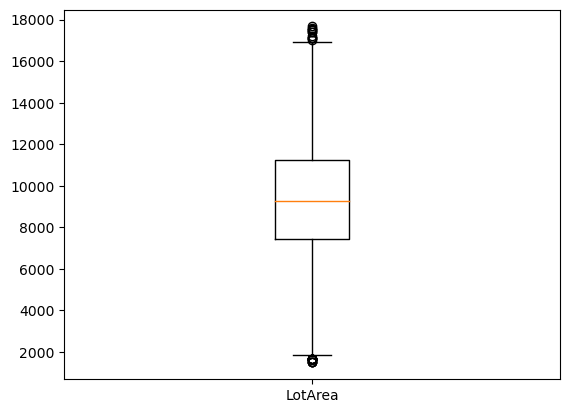

In [350]:
# Dropping outlier from 'LotArea' column
Q1 = train_df2.LotArea.quantile(0.25)
Q3 = train_df2.LotArea.quantile(0.75)
IQR = Q3 - Q1
train_df3 = train_df2[(train_df2.LotArea >= Q1-1.5*IQR) & (train_df2.LotArea <= Q3+1.5*IQR)]

# After dropping outlier from 'LotArea' column
plt.boxplot(train_df3.LotArea)
plt.xticks([1],['LotArea'])
plt.show()

In [351]:
train_df3.shape

(1391, 47)

In [352]:
print(len(train_df2))
print(len(train_df3))
print((len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

1460
1391
95.27397260273973


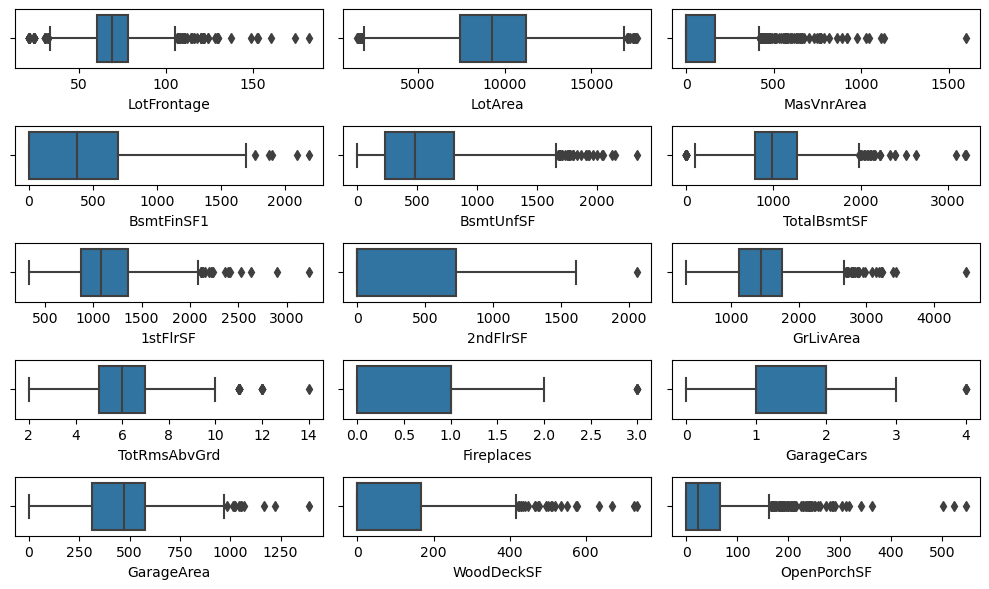

In [353]:
# Outlier Analysis
fig, axs = plt.subplots(5,3, figsize=(10,6))
plt1 = sns.boxplot(train_df3['LotFrontage'], ax = axs[0, 0])
plt2 = sns.boxplot(train_df3['LotArea'], ax = axs[0, 1])
plt3 = sns.boxplot(train_df3['MasVnrArea'], ax = axs[0, 2])
plt4 = sns.boxplot(train_df3['BsmtFinSF1'], ax = axs[1, 0])
plt5 = sns.boxplot(train_df3['BsmtUnfSF'], ax = axs[1, 1]) # BsmtFinSF2
plt6 = sns.boxplot(train_df3['TotalBsmtSF'], ax = axs[1, 2])
plt6 = sns.boxplot(train_df3['1stFlrSF'], ax = axs[2, 0])
plt6 = sns.boxplot(train_df3['2ndFlrSF'], ax = axs[2, 1])
plt6 = sns.boxplot(train_df3['GrLivArea'], ax = axs[2, 2])
plt6 = sns.boxplot(train_df3['TotRmsAbvGrd'], ax = axs[3, 0]) # LowQualFinSF
plt6 = sns.boxplot(train_df3['Fireplaces'], ax = axs[3, 1])
plt6 = sns.boxplot(train_df3['GarageCars'], ax = axs[3, 2])
plt6 = sns.boxplot(train_df3['GarageArea'], ax = axs[4, 0])
plt6 = sns.boxplot(train_df3['WoodDeckSF'], ax = axs[4, 1])
plt6 = sns.boxplot(train_df3['OpenPorchSF'], ax = axs[4, 2])

plt.tight_layout()

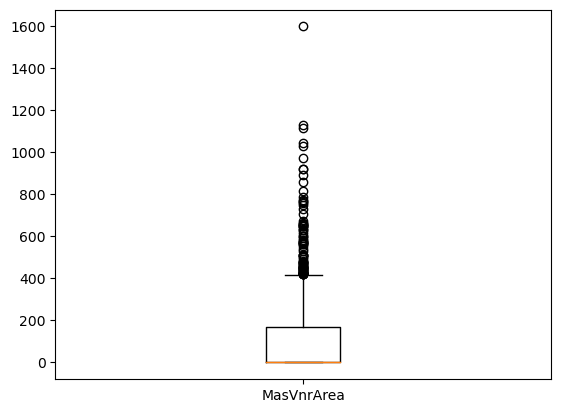

In [354]:
# Let us start with the 'MasVnrArea' column
# Before dropping outlier from 'MasVnrArea' column
plt.boxplot(train_df3.MasVnrArea)
plt.xticks([1],['MasVnrArea'])
plt.show()

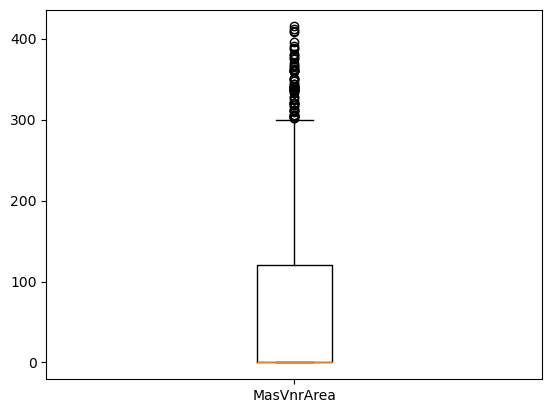

In [355]:
# Dropping outlier from 'MasVnrArea' column
Q1 = train_df3.MasVnrArea.quantile(0.25)
Q3 = train_df3.MasVnrArea.quantile(0.75)
IQR = Q3 - Q1
train_df3 = train_df3[(train_df3.MasVnrArea >= Q1-1.5*IQR) & (train_df3.MasVnrArea <= Q3+1.5*IQR)]

# After dropping outlier from 'MasVnrArea' column
plt.boxplot(train_df3.MasVnrArea)
plt.xticks([1],['MasVnrArea'])
plt.show()

In [356]:
print('Records in df2', len(train_df2))
print('Records in df3', len(train_df3))
print('Ratio after outlier removal', (len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

Records in df2 1460
Records in df3 1305
Ratio after outlier removal 89.38356164383562


This seems removing outlier losses lots of data items. <br/>
So let us remove data only below 0.01 or above 0.99 percentile.

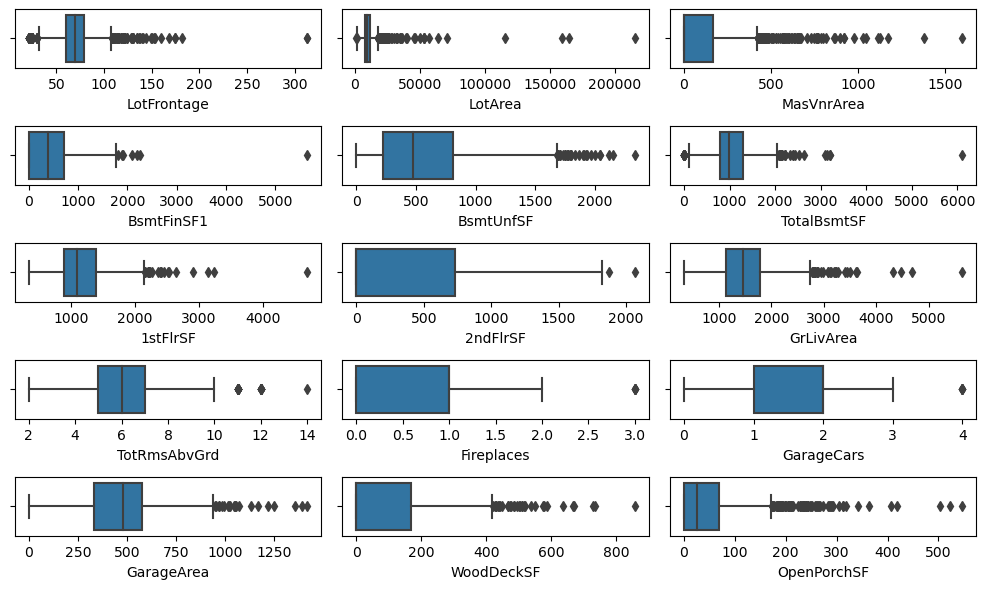

In [357]:
# Outlier Analysis
fig, axs = plt.subplots(5,3, figsize=(10,6))
plt1 = sns.boxplot(train_df2['LotFrontage'], ax = axs[0, 0])
plt2 = sns.boxplot(train_df2['LotArea'], ax = axs[0, 1])
plt3 = sns.boxplot(train_df2['MasVnrArea'], ax = axs[0, 2])
plt4 = sns.boxplot(train_df2['BsmtFinSF1'], ax = axs[1, 0])
plt5 = sns.boxplot(train_df2['BsmtUnfSF'], ax = axs[1, 1]) # BsmtFinSF2
plt6 = sns.boxplot(train_df2['TotalBsmtSF'], ax = axs[1, 2])
plt6 = sns.boxplot(train_df2['1stFlrSF'], ax = axs[2, 0])
plt6 = sns.boxplot(train_df2['2ndFlrSF'], ax = axs[2, 1])
plt6 = sns.boxplot(train_df2['GrLivArea'], ax = axs[2, 2])
plt6 = sns.boxplot(train_df2['TotRmsAbvGrd'], ax = axs[3, 0]) # LowQualFinSF
plt6 = sns.boxplot(train_df2['Fireplaces'], ax = axs[3, 1])
plt6 = sns.boxplot(train_df2['GarageCars'], ax = axs[3, 2])
plt6 = sns.boxplot(train_df2['GarageArea'], ax = axs[4, 0])
plt6 = sns.boxplot(train_df2['WoodDeckSF'], ax = axs[4, 1])
plt6 = sns.boxplot(train_df2['OpenPorchSF'], ax = axs[4, 2])

plt.tight_layout()

In [358]:
for i in range(0,len(dn)-1):
    qna = train_df2[dn[i]].quantile(0.01)
    qnb = train_df2[dn[i]].quantile(0.99)
    IQR = qnb - qna
    print(f"{i:2} {dn[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")

 0 LotFrontage          21.00     137.41     116.41
 1 LotArea            1680.00   37567.64   35887.64
 2 MasVnrArea            0.00     791.28     791.28
 3 BsmtFinSF1            0.00    1572.41    1572.41
 4 BsmtUnfSF             0.00    1797.05    1797.05
 5 TotalBsmtSF           0.00    2155.05    2155.05
 6 1stFlrSF            520.00    2219.46    1699.46
 7 2ndFlrSF              0.00    1418.92    1418.92
 8 GrLivArea           692.18    3123.48    2431.30
 9 TotRmsAbvGrd          3.00      11.00       8.00
10 Fireplaces            0.00       2.00       2.00
11 GarageCars            0.00       3.00       3.00
12 GarageArea            0.00    1002.79    1002.79
13 WoodDeckSF            0.00     505.46     505.46
14 OpenPorchSF           0.00     285.82     285.82


In [359]:
qna = train_df2.LotArea.quantile(0.01)
qnb = train_df2.LotArea.quantile(0.99)
train_df3 =  train_df2[(train_df2.LotArea >= qna) & (train_df2.LotArea <= qnb)]

In [360]:
len(train_df3)

1438

In [361]:
dna=['TotalBsmtSF','LotFrontage','BsmtFinSF1','BsmtUnfSF'] 
dnb=['MasVnrArea','1stFlrSF','GarageArea','GrLivArea','WoodDeckSF','OpenPorchSF']  

In [362]:
for i in range(0,len(dna)):
    qna = train_df3[dna[i]].quantile(0.01)
    qnb = train_df3[dna[i]].quantile(0.99)
    #train_df3 = train_df3[(train_df3[dna[i]] >= qna) & (train_df3[dna[i]] <= qnb)]
    print(f"{i:2} {dna[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")

 0 TotalBsmtSF           0.00    2130.45     285.82
 1 LotFrontage          21.00     134.00     285.82
 2 BsmtFinSF1            0.00    1557.01     285.82
 3 BsmtUnfSF             0.00    1798.15     285.82


In [363]:
for i in range(0,len(dnb)):    
    qna = train_df3[dnb[i]].quantile(0.01)
    qnb = train_df3[dnb[i]].quantile(0.99)
    train_df3 = train_df3[(train_df3[dnb[i]] <= qnb)]
    print(f"{i:2} {dnb[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")

 0 MasVnrArea            0.00     782.08     285.82
 1 1stFlrSF            520.00    2151.60     285.82
 2 GarageArea            0.00     967.02     285.82
 3 GrLivArea           707.20    2795.28     285.82
 4 WoodDeckSF            0.00     469.76     285.82
 5 OpenPorchSF           0.00     277.96     285.82


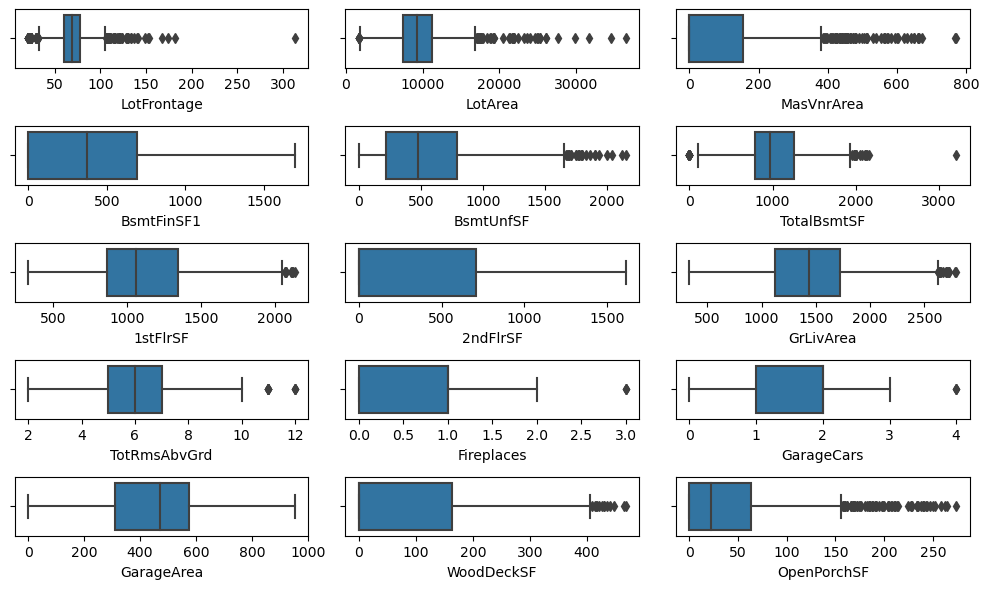

In [364]:
# Outlier Analysis
fig, axs = plt.subplots(5,3, figsize=(10,6))
plt1 = sns.boxplot(train_df3['LotFrontage'], ax = axs[0, 0])
plt2 = sns.boxplot(train_df3['LotArea'], ax = axs[0, 1])
plt3 = sns.boxplot(train_df3['MasVnrArea'], ax = axs[0, 2])
plt4 = sns.boxplot(train_df3['BsmtFinSF1'], ax = axs[1, 0])
plt5 = sns.boxplot(train_df3['BsmtUnfSF'], ax = axs[1, 1]) # BsmtFinSF2
plt6 = sns.boxplot(train_df3['TotalBsmtSF'], ax = axs[1, 2])
plt6 = sns.boxplot(train_df3['1stFlrSF'], ax = axs[2, 0])
plt6 = sns.boxplot(train_df3['2ndFlrSF'], ax = axs[2, 1])
plt6 = sns.boxplot(train_df3['GrLivArea'], ax = axs[2, 2])
plt6 = sns.boxplot(train_df3['TotRmsAbvGrd'], ax = axs[3, 0]) # LowQualFinSF
plt6 = sns.boxplot(train_df3['Fireplaces'], ax = axs[3, 1])
plt6 = sns.boxplot(train_df3['GarageCars'], ax = axs[3, 2])
plt6 = sns.boxplot(train_df3['GarageArea'], ax = axs[4, 0])
plt6 = sns.boxplot(train_df3['WoodDeckSF'], ax = axs[4, 1])
plt6 = sns.boxplot(train_df3['OpenPorchSF'], ax = axs[4, 2])

plt.tight_layout()

In [365]:
train_df3.shape

(1351, 47)

In [366]:
print('Records in df2', len(train_df2))
print('Records in df3', len(train_df3))
print('Ratio after outlier removal', (len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

Records in df2 1460
Records in df3 1351
Ratio after outlier removal 92.53424657534246


<strong>Outlier Analysis:</strong> 
Record reduction seems to be high. <br/>
Let us remove outliers from selected features.

In [367]:
qna = train_df2.LotArea.quantile(0.01)
qnb = train_df2.LotArea.quantile(0.99)
train_df3 =  train_df2[(train_df2.LotArea >= qna) & (train_df2.LotArea <= qnb)]

In [368]:
dna=['TotalBsmtSF'] # considering Total Basement area, - 'LotFrontage','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'
dnb=['MasVnrArea','GrLivArea','WoodDeckSF','OpenPorchSF'] 
    # ,'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea'
    # '1stFlrSF','LowQualFinSF','GarageArea', 'MiscVal'

In [369]:
for i in range(0,len(dna)):
    qna = train_df3[dna[i]].quantile(0.01)
    qnb = train_df3[dna[i]].quantile(0.99)
    train_df3 = train_df3[(train_df3[dna[i]] >= qna) & (train_df3[dna[i]] <= qnb)]
    print(f"{i:2} {dna[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")
print(train_df3.shape)

 0 TotalBsmtSF           0.00    2130.45     285.82
(1423, 47)


In [370]:
for i in range(0,len(dnb)):    
    qna = train_df3[dnb[i]].quantile(0.01)
    qnb = train_df3[dnb[i]].quantile(0.99)
    train_df3 = train_df3[(train_df3[dnb[i]] <= qnb)]
    print(f"{i:2} {dnb[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")
print(train_df3.shape)

 0 MasVnrArea            0.00     718.24     285.82
 1 GrLivArea           708.84    2865.20     285.82
 2 WoodDeckSF            0.00     476.80     285.82
 3 OpenPorchSF           0.00     276.42     285.82
(1365, 47)


In [371]:
print('Records in df2', len(train_df2))
print('Records in df3', len(train_df3))
print('Ratio after outlier removal', (len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

Records in df2 1460
Records in df3 1365
Ratio after outlier removal 93.4931506849315


<strong>Outlier Analysis:</strong> Let us test on lesser fields.

In [372]:
qna = train_df2.LotArea.quantile(0.01)
qnb = train_df2.LotArea.quantile(0.99)
train_df3 =  train_df2[(train_df2.LotArea >= qna) & (train_df2.LotArea <= qnb)]

In [373]:
# dna=[] # considering Total Basement area, - 'LotFrontage','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'
dnb=['TotalBsmtSF','MasVnrArea','WoodDeckSF','OpenPorchSF'] 
    # '1stFlrSF','LowQualFinSF','GarageArea', 'MiscVal'    ,'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea' ,'GrLivArea'

In [374]:
for i in range(0,len(dnb)):    
    qna = train_df3[dnb[i]].quantile(0.01)
    qnb = train_df3[dnb[i]].quantile(0.99)
    train_df3 = train_df3[(train_df3[dnb[i]] <= qnb)]
    print(f"{i:2} {dnb[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")
print(train_df3.shape)
print('Ratio after outlier removal', (len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

 0 TotalBsmtSF           0.00    2130.45     285.82
 1 MasVnrArea            0.00     718.24     285.82
 2 WoodDeckSF            0.00     485.30     285.82
 3 OpenPorchSF           0.00     274.88     285.82
(1379, 47)
Ratio after outlier removal 94.45205479452055


### Checking colinearity between columns

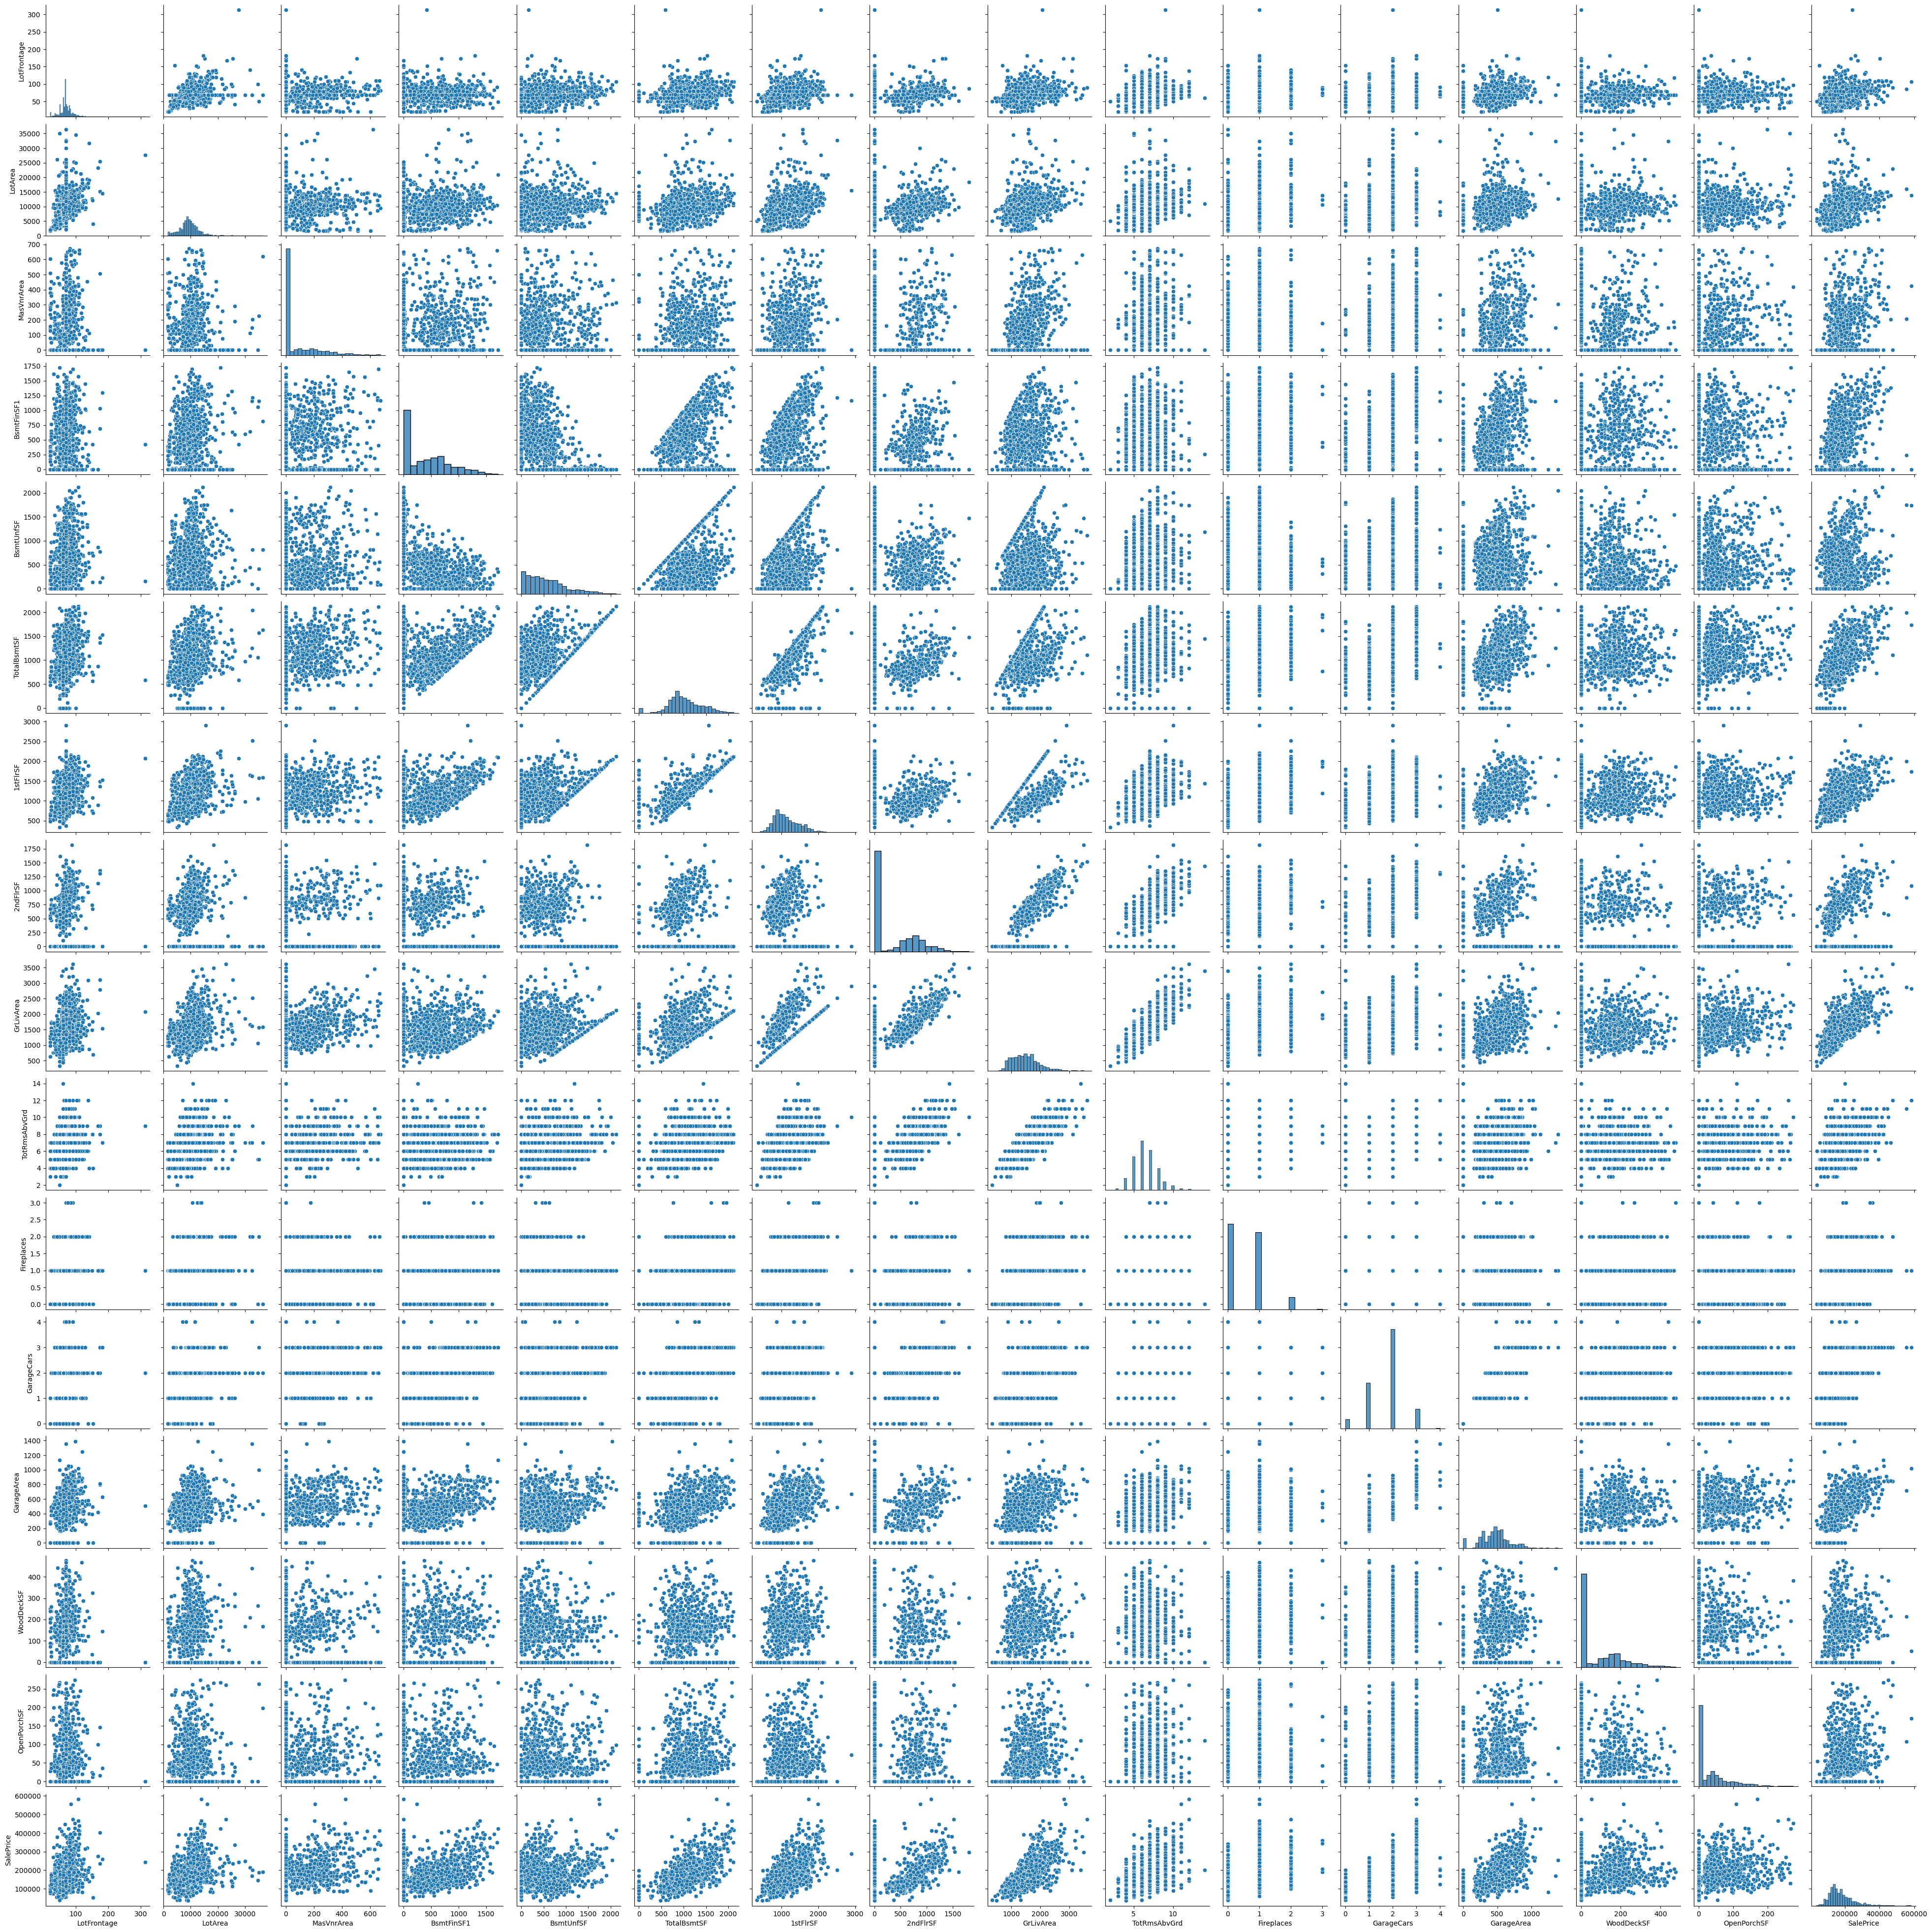

In [376]:
# Let us visualize correlation between all numerical variables
sns.pairplot(train_df3, vars=train_df3[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF',
                                         'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'TotRmsAbvGrd','Fireplaces',
                                         'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF', 'SalePrice']])
plt.show()

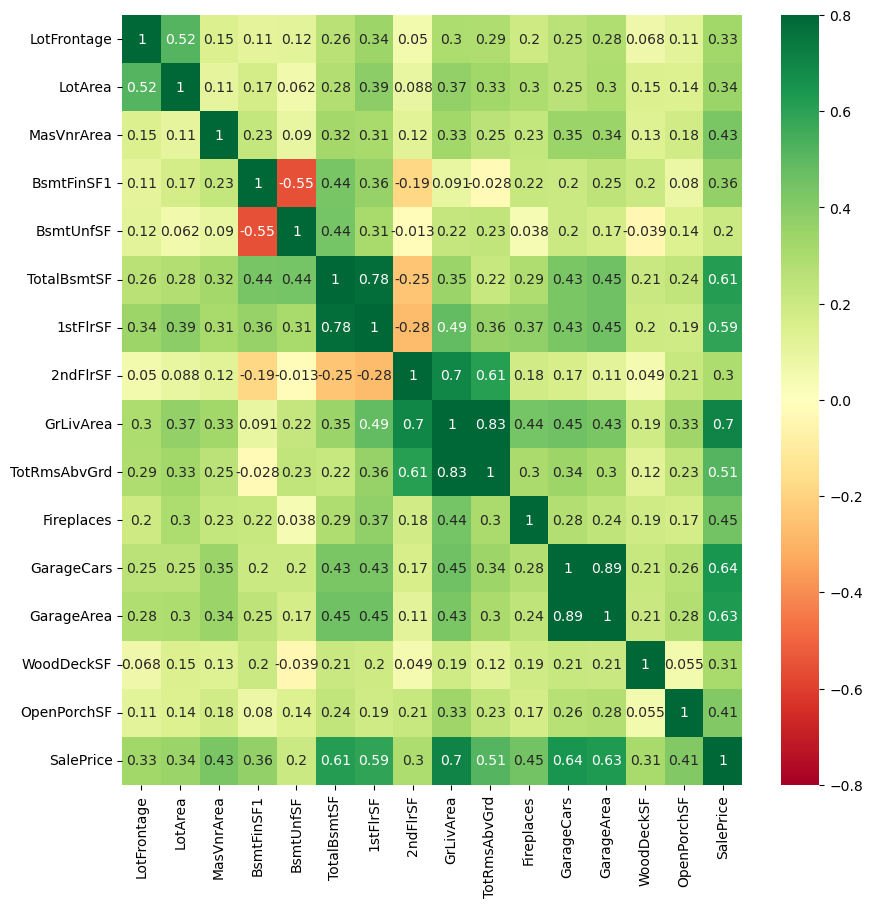

In [377]:
# Heatmap relation betweeen numeric columns
corr = train_df3[dn].corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

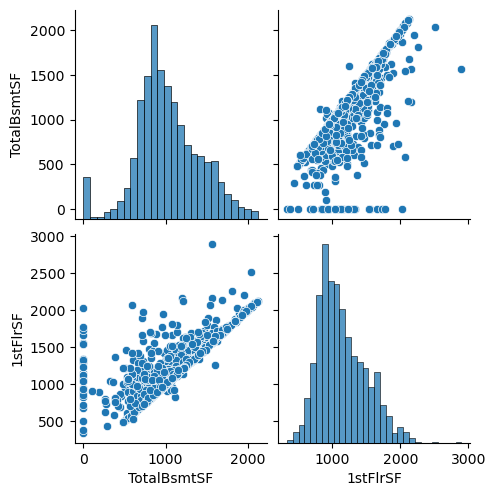

In [378]:
# Let us visualize correlation between TotalBsmtSF and 1stFlrSF features
sns.pairplot(train_df3, vars=["TotalBsmtSF","1stFlrSF"]) 
plt.show()

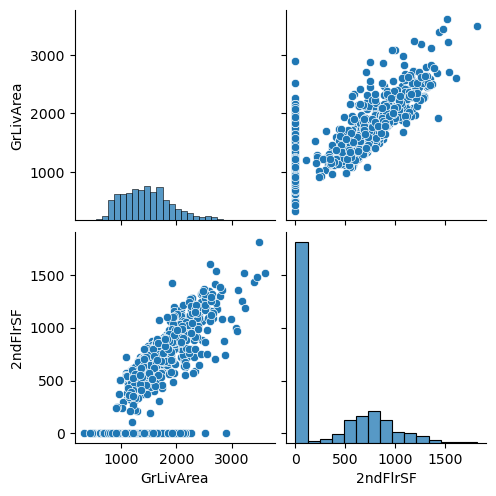

In [379]:
# Let us visualize correlation between GrLivArea and TotRmsAbvGrd features
sns.pairplot(train_df3, vars=["GrLivArea","2ndFlrSF"]) 
plt.show()

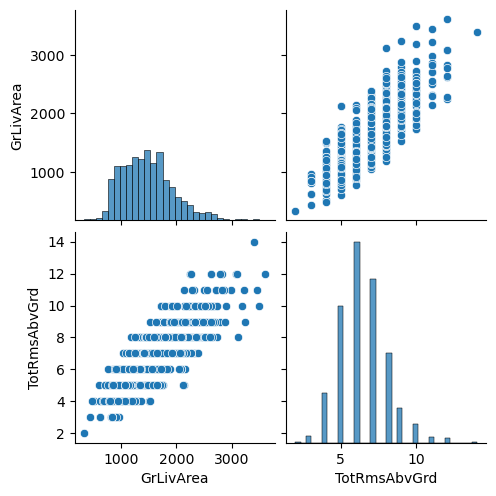

In [380]:
# Let us visualize correlation between GrLivArea and TotRmsAbvGrd features
sns.pairplot(train_df3, vars=["GrLivArea","TotRmsAbvGrd"])
plt.show()

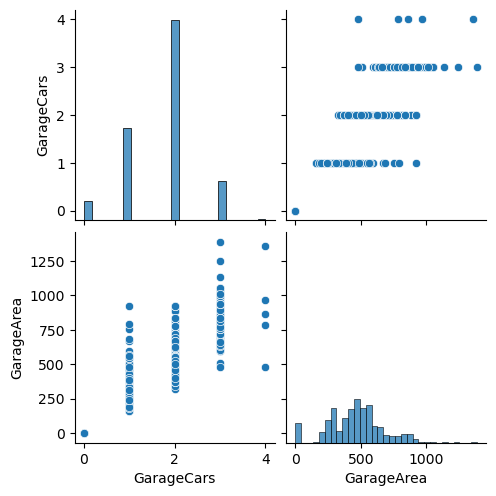

In [381]:
# Let us visualize correlation between GarageCars and GarageArea features
sns.pairplot(train_df3, vars=["GarageCars","GarageArea"]) 
plt.show()

As per above charts, we can drop any variable from the above highly corelated pair of variables.

In [382]:
train_df4 = train_df3.drop(['TotRmsAbvGrd','2ndFlrSF','1stFlrSF', 'GarageArea'], axis=1)
train_df4.shape

(1379, 43)

In [383]:
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1379 non-null   int64  
 1   MSZoning      1379 non-null   object 
 2   LotFrontage   1379 non-null   float64
 3   LotArea       1379 non-null   int64  
 4   LotShape      1379 non-null   object 
 5   LotConfig     1379 non-null   object 
 6   Neighborhood  1379 non-null   object 
 7   HouseStyle    1379 non-null   object 
 8   OverallQual   1379 non-null   int64  
 9   OverallCond   1379 non-null   int64  
 10  YearBuilt     1379 non-null   int64  
 11  YearRemodAdd  1379 non-null   int64  
 12  RoofStyle     1379 non-null   object 
 13  Exterior1st   1379 non-null   object 
 14  Exterior2nd   1379 non-null   object 
 15  MasVnrType    1379 non-null   object 
 16  MasVnrArea    1379 non-null   float64
 17  ExterQual     1379 non-null   object 
 18  Foundation    1379 non-null 

### Creating Derived Columns
As per the data description, Remodel date is same as construction date if no remodeling or additions. <br/>
Thus, let us calculate the property age and Remodel staus based on YearBuilt, YrSold and YearRemodAdd years.

In [384]:
train_df4["PropertyAge"] = train_df4.YrSold - train_df4.YearBuilt

In [385]:
train_df4["IsRemodelled"] = (train_df4.YearRemodAdd - train_df4.YearBuilt >= 1).astype(int)

In [386]:
train_df4.shape

(1379, 45)

Let us delete above year fields now as those seems to be categorical fields and no more required in further analysis. <br/>
We'll also delete additional more granular field 'MoSold' which is not required further analysis.

In [387]:
train_df4 = train_df4.drop(['YrSold','YearBuilt','YearRemodAdd','MoSold'], axis=1)
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1458
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1379 non-null   int64  
 1   MSZoning      1379 non-null   object 
 2   LotFrontage   1379 non-null   float64
 3   LotArea       1379 non-null   int64  
 4   LotShape      1379 non-null   object 
 5   LotConfig     1379 non-null   object 
 6   Neighborhood  1379 non-null   object 
 7   HouseStyle    1379 non-null   object 
 8   OverallQual   1379 non-null   int64  
 9   OverallCond   1379 non-null   int64  
 10  RoofStyle     1379 non-null   object 
 11  Exterior1st   1379 non-null   object 
 12  Exterior2nd   1379 non-null   object 
 13  MasVnrType    1379 non-null   object 
 14  MasVnrArea    1379 non-null   float64
 15  ExterQual     1379 non-null   object 
 16  Foundation    1379 non-null   object 
 17  BsmtQual      1379 non-null   object 
 18  BsmtExposure  1379 non-null 

### Dummy Variables

As per the Data Description, features MSZoning, LotShape, LotConfig, etc., contains different categorical values, which represents specific labels associated with them. Let us create numericals columns (dummy) based on teh available categorical data values.

In [388]:
Cols_4_dummy = []
for i in range(0,train_df4.shape[1]):
    if train_df4[train_df4.columns[i]].dtype == 'object':
            print(i+1,
                  train_df4[train_df4.columns[i]].dtype, 
                  train_df4.columns[i], 
                  train_df4[train_df4.columns[i]].value_counts().max()/1460*100, 
                  train_df4[train_df4.columns[i]].nunique(), sep=" | ") 
            Cols_4_dummy.append(train_df4.columns[i])
print(Cols_4_dummy) 

2 | object | MSZoning | 74.72602739726028 | 5
5 | object | LotShape | 60.82191780821918 | 4
6 | object | LotConfig | 68.4931506849315 | 5
7 | object | Neighborhood | 14.931506849315069 | 25
8 | object | HouseStyle | 47.397260273972606 | 8
11 | object | RoofStyle | 75.13698630136987 | 6
12 | object | Exterior1st | 33.83561643835616 | 15
13 | object | Exterior2nd | 33.082191780821915 | 16
14 | object | MasVnrType | 56.43835616438356 | 5
16 | object | ExterQual | 59.45205479452055 | 4
17 | object | Foundation | 41.43835616438356 | 6
18 | object | BsmtQual | 43.15068493150685 | 5
19 | object | BsmtExposure | 62.671232876712324 | 5
20 | object | BsmtFinType1 | 28.356164383561644 | 7
24 | object | HeatingQC | 47.671232876712324 | 5
30 | object | KitchenQual | 48.08219178082192 | 4
32 | object | FireplaceQu | 46.02739726027397 | 6
33 | object | GarageType | 55.821917808219176 | 7
35 | object | GarageFinish | 39.93150684931507 | 4
['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseSty

#### Creating dummy variables for 'MSZoning' feature

In [389]:
# Creating dummy variables for 'MSZoning' feature and saving into new dataframe 'status'
train_df4.MSZoning.value_counts()

RL         1091
RM          203
FV           60
RH           16
C (all)       9
Name: MSZoning, dtype: int64

In [390]:
status = pd.get_dummies(train_df4['MSZoning'], drop_first=True)
status

FV  RH  RL  RM
0      0   0   1   0
1      0   0   1   0
2      0   0   1   0
3      0   0   1   0
4      0   0   1   0
...   ..  ..  ..  ..
1454   1   0   0   0
1455   0   0   1   0
1456   0   0   1   0
1457   0   0   1   0
1458   0   0   1   0

[1379 rows x 4 columns]

In [391]:
# Merging the dummy variables with the original dataframe and creating a new dataframe
train_df5 = pd.concat([train_df4,status], axis=1)

In [392]:
# Drop the original field as we have created the dummies for it
train_df5.drop(['MSZoning'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60         65.0     8450      Reg    Inside      CollgCr   
1          20         80.0     9600      Reg       FR2      Veenker   
2          60         68.0    11250      IR1    Inside      CollgCr   
3          70         60.0     9550      IR1    Corner      Crawfor   
4          60         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle  ... GarageCars WoodDeckSF  \
0     2Story            7            5     Gable  ...          2          0   
1     1Story            6            8     Gable  ...          2        298   
2     2Story            7            5     Gable  ...          2          0   
3     2Story            7            5     Gable  ...          3          0   
4     2Story            8            5     Gable  ...          3        192   

  OpenPorchSF  SalePrice PropertyAge IsRemodelled FV RH RL  RM  
0          61     208500           5            0  0  0  1   0  
1           0     181500          31            0  0  0  1   0  
2          42     223500           7            1  0  0  1   0  
3          35     140000          91            1  0  0  1   0  
4          84     250000           8            0  0  0  1   0  

[5 rows x 44 columns]

#### Creating dummy variables for 'LotShape' feature

In [393]:
# Creating dummy variables for 'LotShape' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['LotShape'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['LotShape'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea LotConfig Neighborhood HouseStyle  \
0          60         65.0     8450    Inside      CollgCr     2Story   
1          20         80.0     9600       FR2      Veenker     1Story   
2          60         68.0    11250    Inside      CollgCr     2Story   
3          70         60.0     9550    Corner      Crawfor     2Story   
4          60         84.0    14260       FR2      NoRidge     2Story   

   OverallQual  OverallCond RoofStyle Exterior1st  ... SalePrice PropertyAge  \
0            7            5     Gable     VinylSd  ...    208500           5   
1            6            8     Gable     MetalSd  ...    181500          31   
2            7            5     Gable     VinylSd  ...    223500           7   
3            7            5     Gable     Wd Sdng  ...    140000          91   
4            8            5     Gable     VinylSd  ...    250000           8   

   IsRemodelled FV RH RL RM IR2  IR3  Reg  
0             0  0  0  1  0   0    0    1  
1             0  0  0  1  0   0    0    1  
2             1  0  0  1  0   0    0    0  
3             1  0  0  1  0   0    0    0  
4             0  0  0  1  0   0    0    0  

[5 rows x 46 columns]

#### Creating dummy variables for 'LotConfig' feature

In [394]:
# Creating dummy variables for 'LotConfig' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['LotConfig'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['LotConfig'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea Neighborhood HouseStyle  OverallQual  \
0          60         65.0     8450      CollgCr     2Story            7   
1          20         80.0     9600      Veenker     1Story            6   
2          60         68.0    11250      CollgCr     2Story            7   
3          70         60.0     9550      Crawfor     2Story            7   
4          60         84.0    14260      NoRidge     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  ... RH  RL RM IR2 IR3 Reg  \
0            5     Gable     VinylSd     VinylSd  ...  0   1  0   0   0   1   
1            8     Gable     MetalSd     MetalSd  ...  0   1  0   0   0   1   
2            5     Gable     VinylSd     VinylSd  ...  0   1  0   0   0   0   
3            5     Gable     Wd Sdng     Wd Shng  ...  0   1  0   0   0   0   
4            5     Gable     VinylSd     VinylSd  ...  0   1  0   0   0   0   

  CulDSac  FR2  FR3  Inside  
0       0    0    0       1  
1       0    1    0       0  
2       0    0    0       1  
3       0    0    0       0  
4       0    1    0       0  

[5 rows x 49 columns]

#### Creating dummy variables for 'Neighborhood' feature

In [395]:
# Creating dummy variables for 'Neighborhood' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['Neighborhood'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['Neighborhood'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea HouseStyle  OverallQual  OverallCond  \
0          60         65.0     8450     2Story            7            5   
1          20         80.0     9600     1Story            6            8   
2          60         68.0    11250     2Story            7            5   
3          70         60.0     9550     2Story            7            5   
4          60         84.0    14260     2Story            8            5   

  RoofStyle Exterior1st Exterior2nd MasVnrType  ...  NoRidge NridgHt OldTown  \
0     Gable     VinylSd     VinylSd    BrkFace  ...        0       0       0   
1     Gable     MetalSd     MetalSd       None  ...        0       0       0   
2     Gable     VinylSd     VinylSd    BrkFace  ...        0       0       0   
3     Gable     Wd Sdng     Wd Shng       None  ...        0       0       0   
4     Gable     VinylSd     VinylSd    BrkFace  ...        1       0       0   

  SWISU Sawyer SawyerW  Somerst  StoneBr  Timber Veenker  
0     0      0       0        0        0       0       0  
1     0      0       0        0        0       0       1  
2     0      0       0        0        0       0       0  
3     0      0       0        0        0       0       0  
4     0      0       0        0        0       0       0  

[5 rows x 72 columns]

#### Creating dummy variables for 'HouseStyle' feature

In [396]:
# Creating dummy variables for 'HouseStyle' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['HouseStyle'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['HouseStyle'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond RoofStyle  \
0          60         65.0     8450            7            5     Gable   
1          20         80.0     9600            6            8     Gable   
2          60         68.0    11250            7            5     Gable   
3          70         60.0     9550            7            5     Gable   
4          60         84.0    14260            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ... StoneBr Timber Veenker  \
0     VinylSd     VinylSd    BrkFace       196.0  ...       0      0       0   
1     MetalSd     MetalSd       None         0.0  ...       0      0       1   
2     VinylSd     VinylSd    BrkFace       162.0  ...       0      0       0   
3     Wd Sdng     Wd Shng       None         0.0  ...       0      0       0   
4     VinylSd     VinylSd    BrkFace       350.0  ...       0      0       0   

  1.5Unf 1Story  2.5Fin  2.5Unf  2Story SFoyer  SLvl  
0      0      0       0       0       1      0     0  
1      0      1       0       0       0      0     0  
2      0      0       0       0       1      0     0  
3      0      0       0       0       1      0     0  
4      0      0       0       0       1      0     0  

[5 rows x 78 columns]

#### Creating dummy variables for 'RoofStyle' feature

In [397]:
# Creating dummy variables for 'RoofStyle' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['RoofStyle'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['RoofStyle'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond Exterior1st  \
0          60         65.0     8450            7            5     VinylSd   
1          20         80.0     9600            6            8     MetalSd   
2          60         68.0    11250            7            5     VinylSd   
3          70         60.0     9550            7            5     Wd Sdng   
4          60         84.0    14260            8            5     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual  ... 2.5Fin 2.5Unf 2Story  \
0     VinylSd    BrkFace       196.0        Gd  ...      0      0      1   
1     MetalSd       None         0.0        TA  ...      0      0      0   
2     VinylSd    BrkFace       162.0        Gd  ...      0      0      1   
3     Wd Shng       None         0.0        TA  ...      0      0      1   
4     VinylSd    BrkFace       350.0        Gd  ...      0      0      1   

  SFoyer  SLvl  Gable  Gambrel Hip  Mansard  Shed  
0      0     0      1        0   0        0     0  
1      0     0      1        0   0        0     0  
2      0     0      1        0   0        0     0  
3      0     0      1        0   0        0     0  
4      0     0      1        0   0        0     0  

[5 rows x 82 columns]

#### Creating dummy variables for 'Exterior1st' feature

In [398]:
# Creating dummy variables for 'Exterior1st' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['Exterior1st'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['Exterior1st'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond Exterior2nd  \
0          60         65.0     8450            7            5     VinylSd   
1          20         80.0     9600            6            8     MetalSd   
2          60         68.0    11250            7            5     VinylSd   
3          70         60.0     9550            7            5     Wd Shng   
4          60         84.0    14260            8            5     VinylSd   

  MasVnrType  MasVnrArea ExterQual Foundation  ... CemntBd HdBoard ImStucc  \
0    BrkFace       196.0        Gd      PConc  ...       0       0       0   
1       None         0.0        TA     CBlock  ...       0       0       0   
2    BrkFace       162.0        Gd      PConc  ...       0       0       0   
3       None         0.0        TA     BrkTil  ...       0       0       0   
4    BrkFace       350.0        Gd      PConc  ...       0       0       0   

   MetalSd  Plywood  Stone Stucco  VinylSd  Wd Sdng  WdShing  
0        0        0      0      0        1        0        0  
1        1        0      0      0        0        0        0  
2        0        0      0      0        1        0        0  
3        0        0      0      0        0        1        0  
4        0        0      0      0        1        0        0  

[5 rows x 95 columns]

#### Creating dummy variables for 'Exterior2nd' feature

In [399]:
# Creating dummy variables for 'Exterior2nd' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['Exterior2nd'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['Exterior2nd'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond MasVnrType  \
0          60         65.0     8450            7            5    BrkFace   
1          20         80.0     9600            6            8       None   
2          60         68.0    11250            7            5    BrkFace   
3          70         60.0     9550            7            5       None   
4          60         84.0    14260            8            5    BrkFace   

   MasVnrArea ExterQual Foundation BsmtQual  ... HdBoard ImStucc  MetalSd  \
0       196.0        Gd      PConc       Gd  ...       0       0        0   
1         0.0        TA     CBlock       Gd  ...       0       0        1   
2       162.0        Gd      PConc       Gd  ...       0       0        0   
3         0.0        TA     BrkTil       TA  ...       0       0        0   
4       350.0        Gd      PConc       Gd  ...       0       0        0   

   Other  Plywood Stone  Stucco  VinylSd  Wd Sdng  Wd Shng  
0      0        0     0       0        1        0        0  
1      0        0     0       0        0        0        0  
2      0        0     0       0        1        0        0  
3      0        0     0       0        0        0        1  
4      0        0     0       0        1        0        0  

[5 rows x 109 columns]

#### Creating dummy variables for 'MasVnrType' feature

In [400]:
# Creating dummy variables for 'MasVnrType' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['MasVnrType'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['MasVnrType'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  ExterQual Foundation BsmtQual BsmtExposure  ... Plywood  Stone  Stucco  \
0        Gd      PConc       Gd           No  ...       0      0       0   
1        TA     CBlock       Gd           Gd  ...       0      0       0   
2        Gd      PConc       Gd           Mn  ...       0      0       0   
3        TA     BrkTil       TA           No  ...       0      0       0   
4        Gd      PConc       Gd           Av  ...       0      0       0   

   VinylSd Wd Sdng  Wd Shng  BrkFace  NA  None  Stone  
0        1       0        0        1   0     0      0  
1        0       0        0        0   0     1      0  
2        1       0        0        1   0     0      0  
3        0       0        1        0   0     1      0  
4        1       0        0        1   0     0      0  

[5 rows x 112 columns]

#### Creating dummy variables for 'ExterQual' feature

In [401]:
# Creating dummy variables for 'ExterQual' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['ExterQual'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['ExterQual'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  Foundation BsmtQual BsmtExposure BsmtFinType1  ...  VinylSd  Wd Sdng  \
0      PConc       Gd           No          GLQ  ...        1        0   
1     CBlock       Gd           Gd          ALQ  ...        0        0   
2      PConc       Gd           Mn          GLQ  ...        1        0   
3     BrkTil       TA           No          ALQ  ...        0        0   
4      PConc       Gd           Av          GLQ  ...        1        0   

   Wd Shng BrkFace  NA  None  Stone  Fa  Gd TA  
0        0       1   0     0      0   0   1  0  
1        0       0   0     1      0   0   0  1  
2        0       1   0     0      0   0   1  0  
3        1       0   0     1      0   0   0  1  
4        0       1   0     0      0   0   1  0  

[5 rows x 114 columns]

#### Creating dummy variables for 'Foundation' feature

In [402]:
# Creating dummy variables for 'Foundation' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['Foundation'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['Foundation'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  ...  None Stone Fa  Gd  TA  \
0       Gd           No          GLQ         706  ...     0     0  0   1   0   
1       Gd           Gd          ALQ         978  ...     1     0  0   0   1   
2       Gd           Mn          GLQ         486  ...     0     0  0   1   0   
3       TA           No          ALQ         216  ...     1     0  0   0   1   
4       Gd           Av          GLQ         655  ...     0     0  0   1   0   

   CBlock  PConc  Slab Stone  Wood  
0       0      1     0     0     0  
1       1      0     0     0     0  
2       0      1     0     0     0  
3       0      0     0     0     0  
4       0      1     0     0     0  

[5 rows x 118 columns]

#### Creating dummy variables for 'BsmtQual' feature

In [403]:
# Creating dummy variables for 'BsmtQual' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['BsmtQual'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['BsmtQual'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  ... TA CBlock  PConc  \
0           No          GLQ         706        150  ...  0      0      1   
1           Gd          ALQ         978        284  ...  1      1      0   
2           Mn          GLQ         486        434  ...  0      0      1   
3           No          ALQ         216        540  ...  1      0      0   
4           Av          GLQ         655        490  ...  0      0      1   

   Slab  Stone  Wood  Fa Gd  NA TA  
0     0      0     0   0  1   0  0  
1     0      0     0   0  1   0  0  
2     0      0     0   0  1   0  0  
3     0      0     0   0  0   0  1  
4     0      0     0   0  1   0  0  

[5 rows x 121 columns]

#### Creating dummy variables for 'BsmtExposure' feature

In [404]:
# Creating dummy variables for 'BsmtExposure' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['BsmtExposure'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['BsmtExposure'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ... Stone  Wood  Fa Gd NA  \
0          GLQ         706        150          856  ...     0     0   0  1  0   
1          ALQ         978        284         1262  ...     0     0   0  1  0   
2          GLQ         486        434          920  ...     0     0   0  1  0   
3          ALQ         216        540          756  ...     0     0   0  0  0   
4          GLQ         655        490         1145  ...     0     0   0  1  0   

   TA Gd  Mn NA No  
0   0  0   0  0  1  
1   0  1   0  0  0  
2   0  0   1  0  0  
3   1  0   0  0  1  
4   0  0   0  0  0  

[5 rows x 124 columns]

#### Creating dummy variables for 'BsmtFinType1' feature

In [405]:
# Creating dummy variables for 'BsmtFinType1' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['BsmtFinType1'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['BsmtFinType1'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  ...  Gd  Mn NA  No  BLQ GLQ  \
0         706        150          856        Ex  ...   0   0  0   1    0   1   
1         978        284         1262        Ex  ...   1   0  0   0    0   0   
2         486        434          920        Ex  ...   0   1  0   0    0   1   
3         216        540          756        Gd  ...   0   0  0   1    0   0   
4         655        490         1145        Ex  ...   0   0  0   0    0   1   

   LwQ NA Rec  Unf  
0    0  0   0    0  
1    0  0   0    0  
2    0  0   0    0  
3    0  0   0    0  
4    0  0   0    0  

[5 rows x 129 columns]

#### Creating dummy variables for 'HeatingQC' feature

In [406]:
# Creating dummy variables for 'HeatingQC' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['HeatingQC'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['HeatingQC'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  BLQ  GLQ  LwQ  NA Rec  \
0         706        150          856       1710  ...    0    1    0   0   0   
1         978        284         1262       1262  ...    0    0    0   0   0   
2         486        434          920       1786  ...    0    1    0   0   0   
3         216        540          756       1717  ...    0    0    0   0   0   
4         655        490         1145       2198  ...    0    1    0   0   0   

   Unf Fa Gd  Po TA  
0    0  0  0   0  0  
1    0  0  0   0  0  
2    0  0  0   0  0  
3    0  0  1   0  0  
4    0  0  0   0  0  

[5 rows x 132 columns]

#### Creating dummy variables for 'KitchenQual' feature

In [407]:
# Creating dummy variables for 'KitchenQual' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['KitchenQual'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['KitchenQual'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  NA  Rec  Unf  Fa Gd Po  \
0         706        150          856       1710  ...   0    0    0   0  0  0   
1         978        284         1262       1262  ...   0    0    0   0  0  0   
2         486        434          920       1786  ...   0    0    0   0  0  0   
3         216        540          756       1717  ...   0    0    0   0  1  0   
4         655        490         1145       2198  ...   0    0    0   0  0  0   

   TA  Fa Gd  TA  
0   0   0  1   0  
1   0   0  0   1  
2   0   0  1   0  
3   0   0  1   0  
4   0   0  1   0  

[5 rows x 134 columns]

#### Creating dummy variables for 'FireplaceQu' feature

In [408]:
# Creating dummy variables for 'FireplaceQu' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['FireplaceQu'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['FireplaceQu'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  Po  TA Fa  Gd  TA Fa  \
0         706        150          856       1710  ...   0   0  0   1   0  0   
1         978        284         1262       1262  ...   0   0  0   0   1  0   
2         486        434          920       1786  ...   0   0  0   1   0  0   
3         216        540          756       1717  ...   0   0  0   1   0  0   
4         655        490         1145       2198  ...   0   0  0   1   0  0   

   Gd NA  Po  TA  
0   0  1   0   0  
1   0  0   0   1  
2   0  0   0   1  
3   1  0   0   0  
4   0  0   0   1  

[5 rows x 138 columns]

#### Creating dummy variables for 'GarageType' feature

In [409]:
# Creating dummy variables for 'GarageType' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['GarageType'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['GarageType'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  Gd  NA  Po  TA  Attchd  \
0         706        150          856       1710  ...   0   1   0   0       1   
1         978        284         1262       1262  ...   0   0   0   1       1   
2         486        434          920       1786  ...   0   0   0   1       1   
3         216        540          756       1717  ...   1   0   0   0       0   
4         655        490         1145       2198  ...   0   0   0   1       1   

   Basment BuiltIn  CarPort  Detchd  NA  
0        0       0        0       0   0  
1        0       0        0       0   0  
2        0       0        0       0   0  
3        0       0        0       1   0  
4        0       0        0       0   0  

[5 rows x 143 columns]

#### Creating dummy variables for 'GarageFinish' feature

In [410]:
# Creating dummy variables for 'GarageFinish' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['GarageFinish'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['GarageFinish'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  TA  Attchd  Basment  \
0         706        150          856       1710  ...   0       1        0   
1         978        284         1262       1262  ...   1       1        0   
2         486        434          920       1786  ...   1       1        0   
3         216        540          756       1717  ...   0       0        0   
4         655        490         1145       2198  ...   1       1        0   

   BuiltIn  CarPort  Detchd  NA  NA  RFn  Unf  
0        0        0       0   0   0    1    0  
1        0        0       0   0   0    1    0  
2        0        0       0   0   0    1    0  
3        0        0       1   0   0    0    1  
4        0        0       0   0   0    1    0  

[5 rows x 145 columns]

In [411]:
train_df5.shape

(1379, 145)

In [412]:
train_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1458
Columns: 145 entries, MSSubClass to Unf
dtypes: float64(3), int32(1), int64(18), uint8(123)
memory usage: 440.3 KB


In [144]:
train_df4.columns.to_list()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'PropertyAge',
 'IsRemodelled',
 'FV',
 'RH',
 'RL',
 'RM',
 'IR2',
 'IR3',
 'Reg',
 'CulDSac',
 'FR2',
 'FR3',
 'Inside',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 '1.5Unf',
 '1Story',
 '2.5Fin',
 '2.5Unf',
 '2Story',
 'SFoyer',
 'SLvl',
 'Gable',
 'Gambrel',
 'Hip',
 'Mansard',
 'Shed',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing',
 'AsphS

We can see that few column names are repeated. So let us try adding prefix to the column names.

In [414]:
Cols_4_dummy

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [422]:
train_df5 = train_df4.copy()
for i in range(0,len(Cols_4_dummy)):
    print(Cols_4_dummy[i])
    status = pd.get_dummies(train_df5[Cols_4_dummy[i]], drop_first=True, prefix=Cols_4_dummy[i])
    print(status.head())
    train_df5 = pd.concat([train_df5,status], axis=1)
    train_df5.drop([Cols_4_dummy[i]], axis = 1, inplace = True)
train_df5.head()

MSZoning
   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0            0            0            1            0
1            0            0            1            0
2            0            0            1            0
3            0            0            1            0
4            0            0            1            0
LotShape
   LotShape_IR2  LotShape_IR3  LotShape_Reg
0             0             0             1
1             0             0             1
2             0             0             0
3             0             0             0
4             0             0             0
LotConfig
   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside
0                  0              0              0                 1
1                  0              1              0                 0
2                  0              0              0                 1
3                  0              0              0                 0
4                  0              1    

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  FireplaceQu_TA  \
0         706        150          856       1710  ...               0   
1         978        284         1262       1262  ...               1   
2         486        434          920       1786  ...               1   
3         216        540          756       1717  ...               0   
4         655        490         1145       2198  ...               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_NA  GarageFinish_NA  \
0                   0                  0              0                0   
1                   0                  0              0                0   
2                   0                  0              0                0   
3                   0                  1              0                0   
4                   0                  0              0                0   

   GarageFinish_RFn  GarageFinish_Unf  
0                 1                 0  
1                 1                 0  
2                 1                 0  
3                 0                 1  
4                 1                 0  

[5 rows x 145 columns]

Let us check for the numeric variables.

In [423]:
for i in range(0,train_df4.shape[1]):
    if train_df4[train_df4.columns[i]].dtype != 'object':
        print(train_df4.columns[i],end="','")

MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces','GarageYrBlt','GarageCars','WoodDeckSF','OpenPorchSF','SalePrice','PropertyAge','IsRemodelled','

### Dummy Encoding for Numeric but categorical feature

As per the Data Dictionary, feature 'MSSubClass' contains numerical values which have specific labels associated with them. As per the labels and the nature of the features there is no order in these values, hence, let us convert thid feature values into categorical string values for further processing.

In [468]:
train_df5.MSSubClass.value_counts()

20     508
60     274
50     141
120     83
30      68
160     58
70      57
80      56
90      52
190     28
85      20
75      13
45      12
180      5
40       4
Name: MSSubClass, dtype: int64

In [469]:
val = sorted(train_df5.MSSubClass.value_counts().index.to_list())
ind = [sorted(val).index(x) for x in val]
dct = dict(zip(val, ind))
print(dct)

{20: 0, 30: 1, 40: 2, 45: 3, 50: 4, 60: 5, 70: 6, 75: 7, 80: 8, 85: 9, 90: 10, 120: 11, 160: 12, 180: 13, 190: 14}


In [467]:
train_df5.MSSubClass.map(dct).value_counts()

0     508
5     274
4     141
11     83
1      68
12     58
6      57
8      56
10     52
14     28
9      20
7      13
3      12
13      5
2       4
Name: MSSubClass, dtype: int64

In [470]:
train_df5.MSSubClass = train_df5.MSSubClass.map(dct)

#### Let us create dummy variable for this field

In [473]:
status = pd.get_dummies(train_df5['MSSubClass'], drop_first=True, prefix='MSSubClass')
train_df5 = pd.concat([train_df5,status], axis=1)
# Delete the original field as we have created dummy fields now
train_df5.drop('MSSubClass', axis = 1, inplace = True)
train_df5.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  ...  MSSubClass_5  \
0        150          856       1710             1  ...             1   
1        284         1262       1262             0  ...             0   
2        434          920       1786             1  ...             1   
3        540          756       1717             1  ...             0   
4        490         1145       2198             1  ...             1   

   MSSubClass_6  MSSubClass_7  MSSubClass_8  MSSubClass_9  MSSubClass_10  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             0             0             0             0              0   
3             1             0             0             0              0   
4             0             0             0             0              0   

   MSSubClass_11  MSSubClass_12  MSSubClass_13  MSSubClass_14  
0              0              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 158 columns]

# Let's check the correlation 

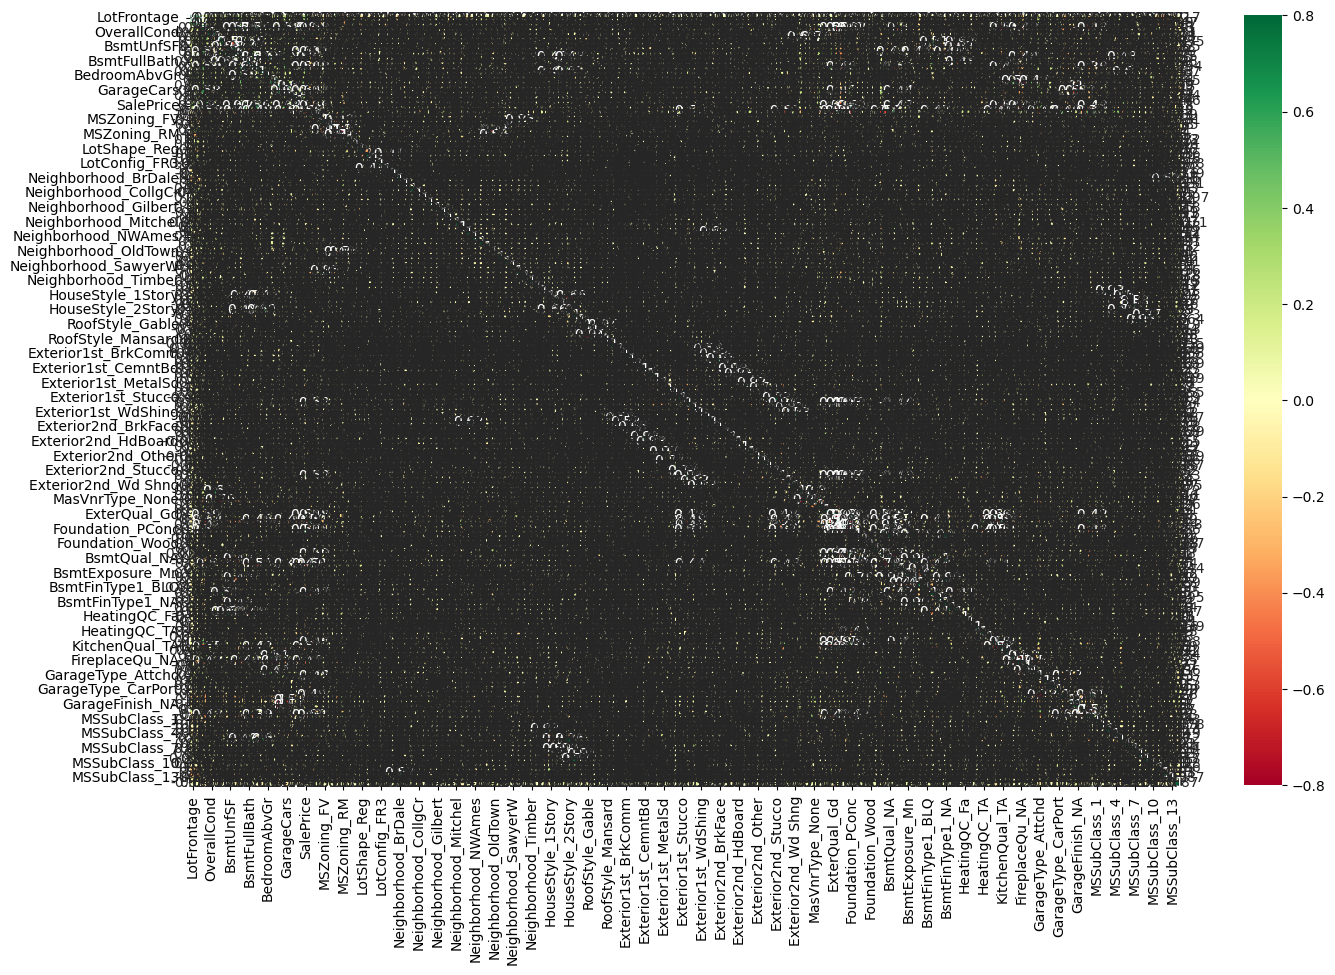

In [474]:
# Let's check the correlation, coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(train_df5.corr(), annot = True, 
            vmax=0.8, vmin=-0.8, 
            cmap='RdYlGn') #cmap="YlGnBu")
plt.show()

In [476]:
# Since we have too many numerical variables, let us check in the dataframe format
train_df5.corr()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
LotFrontage       1.000000  0.516699     0.186378    -0.042581    0.149446   
LotArea           0.516699  1.000000     0.134630    -0.028091    0.105888   
OverallQual       0.186378  0.134630     1.000000    -0.090070    0.371321   
OverallCond      -0.042581 -0.028091    -0.090070     1.000000   -0.129431   
MasVnrArea        0.149446  0.105888     0.371321    -0.129431    1.000000   
...                    ...       ...          ...          ...         ...   
MSSubClass_10     0.017669  0.000948    -0.161879    -0.116398    0.030111   
MSSubClass_11    -0.232816 -0.270299     0.191097    -0.120469    0.015628   
MSSubClass_12    -0.368478 -0.357983     0.022625    -0.066755    0.087719   
MSSubClass_13    -0.117653 -0.099131    -0.047582     0.001073   -0.017516   
MSSubClass_14    -0.017074  0.046690    -0.113553     0.031087   -0.079786   

               BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  \
LotFrontage      0.108563   0.116124     0.258357   0.298912      0.056311   
LotArea          0.174567   0.062490     0.278848   0.366878      0.093309   
OverallQual      0.195736   0.286098     0.507469   0.561318      0.106589   
OverallCond     -0.029582  -0.141661    -0.173550  -0.077575     -0.046375   
MasVnrArea       0.227630   0.090062     0.321791   0.326009      0.096142   
...                   ...        ...          ...        ...           ...   
MSSubClass_10   -0.008310  -0.018316    -0.036449   0.035629      0.034134   
MSSubClass_11    0.104733   0.050508     0.168322  -0.089639      0.106291   
MSSubClass_12   -0.083057  -0.080952    -0.184312  -0.060318     -0.084064   
MSSubClass_13    0.001733  -0.072052    -0.070400  -0.074948      0.069431   
MSSubClass_14   -0.003521  -0.055440    -0.080134   0.035034      0.024824   

               ...  MSSubClass_5  MSSubClass_6  MSSubClass_7  MSSubClass_8  \
LotFrontage    ...      0.179575     -0.047843      0.057784      0.066885   
LotArea        ...      0.174994      0.013241      0.053873      0.049896   
OverallQual    ...      0.342863      0.014703      0.024870     -0.009967   
OverallCond    ...     -0.121907      0.201904      0.036656      0.057578   
MasVnrArea     ...      0.175478     -0.125561     -0.061700      0.036384   
...            ...           ...           ...           ...           ...   
MSSubClass_10  ...     -0.098574     -0.041104     -0.019311     -0.040727   
MSSubClass_11  ...     -0.126017     -0.052548     -0.024688     -0.052066   
MSSubClass_12  ...     -0.104341     -0.043510     -0.020441     -0.043110   
MSSubClass_13  ...     -0.030039     -0.012526     -0.005885     -0.012411   
MSSubClass_14  ...     -0.071688     -0.029893     -0.014044     -0.029619   

               MSSubClass_9  MSSubClass_10  MSSubClass_11  MSSubClass_12  \
LotFrontage        0.007606       0.017669      -0.232816      -0.368478   
LotArea           -0.011345       0.000948      -0.270299      -0.357983   
OverallQual       -0.054537      -0.161879       0.191097       0.022625   
OverallCond        0.056439      -0.116398      -0.120469      -0.066755   
MasVnrArea        -0.031666       0.030111       0.015628       0.087719   
...                     ...            ...            ...            ...   
MSSubClass_10     -0.024014       1.000000      -0.050096      -0.041479   
MSSubClass_11     -0.030700      -0.050096       1.000000      -0.053027   
MSSubClass_12     -0.025420      -0.041479      -0.053027       1.000000   
MSSubClass_13     -0.007318      -0.011941      -0.015266      -0.012640   
MSSubClass_14     -0.017465      -0.028498      -0.036432      -0.030166   

               MSSubClass_13  MSSubClass_14  
LotFrontage        -0.117653      -0.017074  
LotArea            -0.099131       0.046690  
OverallQual        -0.047582      -0.113553  
OverallCond         0.001073       0.031087  
MasVnrArea         -0.017516      -0.079786  
...            